In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, classification_report
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
import nltk
from collections import Counter
import seaborn as sns

In [2]:
#Read data
data = pd.read_csv('IMDB Dataset.csv')

In [3]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [4]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [5]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantxt = re.sub(cleanr, ' ', sentence)
    return cleantxt

def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]', r'', sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r' ', cleaned)
    return cleaned

In [6]:
sno = nltk.stem.SnowballStemmer("english")
stop = set(stopwords.words("english"))
all_positive_words = []
all_negative_words = []
final_string = []
str1 = ''
i = 0
for string in data["review"].values:
    filtered_sentence = []
    # Removes html tags from every review
    sent = cleanHtml(string)
    for w in sent.split():
        # Clean punctuations for every word in a review 
        for cleanwords in cleanpunc(w).split():
            # if cleaned data is alphabet and length of words greater than 2 then proceed
            if ((cleanwords.isalpha()) and len(cleanwords)>2):
                # check whether the word is a stop word or not
                if cleanwords.lower() not in stop:
                    # If the word is not a stop word then append it to filtered sentence
                    s = (sno.stem(cleanwords.lower())).encode('utf-8')
                    filtered_sentence.append(s)
                    if (data["sentiment"].values)[i].lower() == "positive":
                        all_positive_words.append(s)
                    if (data["sentiment"].values)[i].lower() == "negative":
                        all_negative_words.append(s)
                else:
                    continue
            else:
                continue
    # filtered_sentence is the list containing all words of a review after preprocessing
    # join every word in a list to get a string format of the review
    str1 = b" ".join(filtered_sentence)
    #append all the string(cleaned reviews)to final_string
    final_string.append(str1)
    i += 1        

2923508
2848517


C:\Users\johnl\AppData\Local\Temp\ipykernel_17024\973166196.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_words_freq, ax = axis[0])
C:\Users\johnl\AppData\Local\Temp\ipykernel_17024\973166196.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_words_freq, ax = axis[1])
C:\Users\joh

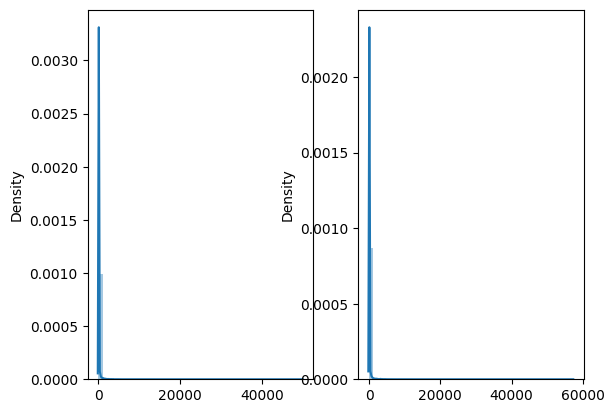

In [7]:
fig, axis = plt.subplots(1, 2)
print(len(all_positive_words))
pos_words_freq = list(Counter(all_positive_words).values())
print(len(all_negative_words))
neg_words_freq = list(Counter(all_negative_words).values())
sns.distplot(pos_words_freq, ax = axis[0])
sns.distplot(neg_words_freq, ax = axis[1])
fig.show()

In [8]:
data["review"] = final_string

In [9]:
def conv_label(label):
    if label.lower() == "positive":
        return 1
    elif label.lower() == "negative":
        return 0

data["sentiment"] = data["sentiment"].map(conv_label)

In [10]:
data.head(15)

,review,sentiment
0,b'one review mention watch episod youll hook r...,1
1,b'wonder littl product film techniqu fashion g...,1
2,b'thought wonder way spend time hot summer wee...,1
3,b'basic there famili littl boy jake think ther...,0
4,b'petter mattei love time money visual stun fi...,1
5,b'probabl favorit movi stori selfless sacrific...,1
6,b'sure would like see resurrect date seahunt s...,1
7,b'show amaz fresh innov idea first air first y...,0
8,b'encourag posit comment film look forward wat...,0
9,b'like origin gut wrench laughter like movi yo...,1


In [11]:
freq_pos_words = nltk.FreqDist(all_positive_words)
freq_pos_words.most_common(15)

[(b'film', 49861),
 (b'movi', 44091),
 (b'one', 27628),
 (b'like', 20043),
 (b'time', 15973),
 (b'good', 14879),
 (b'see', 14854),
 (b'stori', 13877),
 (b'charact', 13804),
 (b'great', 13228),
 (b'make', 13222),
 (b'watch', 12782),
 (b'get', 12625),
 (b'love', 12322),
 (b'well', 11903)]

In [12]:
freq_neg_words = nltk.FreqDist(all_negative_words)
freq_neg_words.most_common(15)

[(b'movi', 57146),
 (b'film', 43977),
 (b'one', 26303),
 (b'like', 24083),
 (b'bad', 15519),
 (b'make', 15474),
 (b'even', 15366),
 (b'get', 15219),
 (b'watch', 14888),
 (b'time', 14818),
 (b'good', 14571),
 (b'charact', 14173),
 (b'would', 13660),
 (b'see', 13023),
 (b'realli', 12323)]

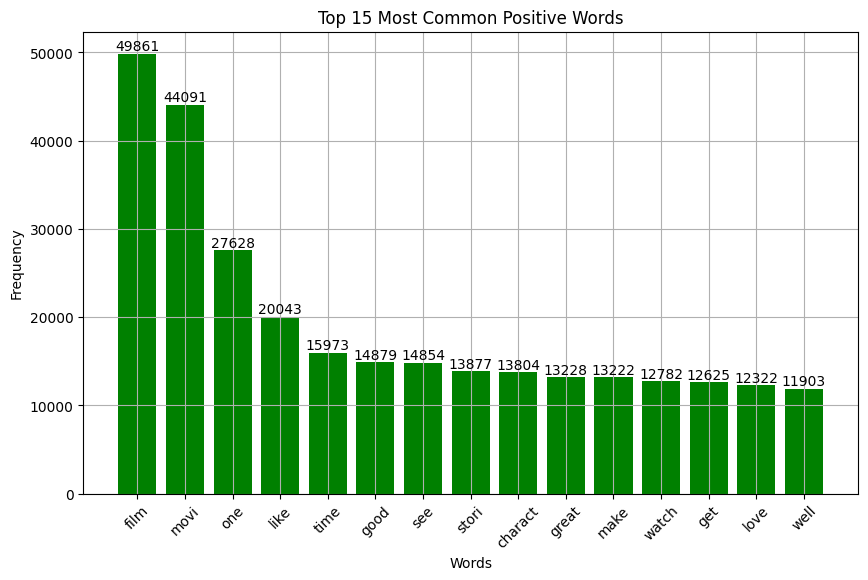

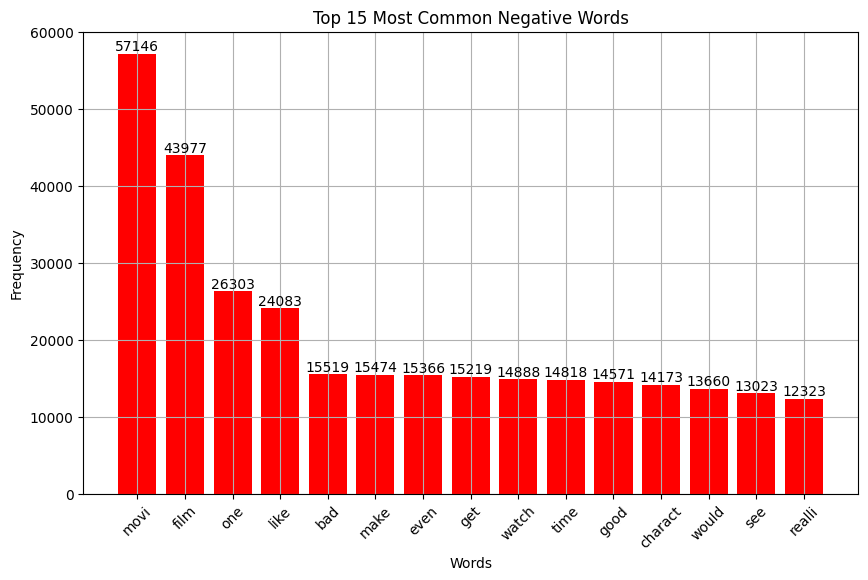

In [13]:
import matplotlib.pyplot as plt

# Plotting the most common positive words
plt.figure(figsize=(10, 6))
freq_pos_words_plot = freq_pos_words.most_common(15)
words, frequencies = zip(*freq_pos_words_plot)
plt.bar(words, frequencies, color='green')
plt.title('Top 15 Most Common Positive Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
for i, freq in enumerate(frequencies):
    plt.text(i, freq, str(freq), ha='center', va='bottom')
plt.show()

# Plotting the most common negative words
plt.figure(figsize=(10, 6))
freq_neg_words_plot = freq_neg_words.most_common(15)
words, frequencies = zip(*freq_neg_words_plot)
plt.bar(words, frequencies, color='red')
plt.title('Top 15 Most Common Negative Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
for i, freq in enumerate(frequencies):
    plt.text(i, freq, str(freq), ha='center', va='bottom')
plt.show()


In [14]:
#Bag of words vector with bi-grams
count_vect = CountVectorizer(ngram_range = (1, 2))
count_vect = count_vect.fit(data["review"].values)
bigram_wrds = count_vect.transform(data["review"].values)


In [15]:
#TF-Idf vector using bi-grams
count_vect_tfidf = TfidfVectorizer(ngram_range = (1, 2))
count_vect_tfidf = count_vect_tfidf.fit(data["review"].values)
tfidf_wrds  = count_vect_tfidf.transform(data["review"].values)
bigram_wrds

<50000x2579569 sparse matrix of type '<class 'numpy.int64'>'
	with 10176883 stored elements in Compressed Sparse Row format>

acc is on test data: 88.22
train accuracy is: 99.65428571428572
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      7411
           1       0.90      0.86      0.88      7589

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000



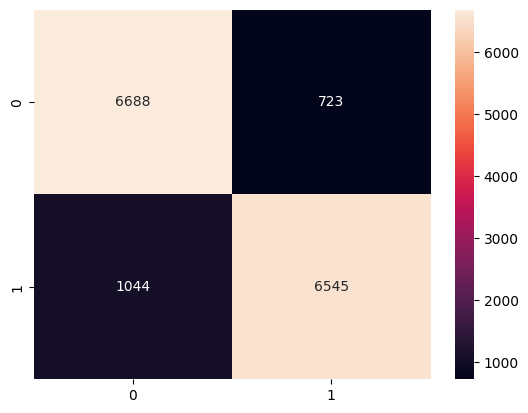

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

# change X to bigram_wrds to run classifier on Bag Of Words(BoW)
X = bigram_wrds
# X = tfidf_wrds
Y = data["sentiment"]
x_l, x_test, y_l, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.7)
clf.fit(x_l, y_l)
pred = clf.predict(x_test)
acc = accuracy_score(y_test, pred, normalize = True) * float(100)  
print("acc is on test data:", acc)
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = 'd')
train_acc = accuracy_score(y_l, clf.predict(x_l), normalize = True) * float(100)

print("train accuracy is:", train_acc)
print(classification_report(y_test, pred))

In [17]:
review = ["This is a worst movie","This is a good movie"]

#initialize BOW vectorizer
#we already fitted the model for train data on "count_vect"(means alredy found probabilities for train data)
vectorize = CountVectorizer(vocabulary = count_vect.vocabulary_)

#Use classifier we trained using Bag of words
polarity = clf.predict(vectorize.transform(review))
# count_vect_tfidf.transform(review)

print(polarity)

[0 1]


In [18]:
import pickle as pkl
f = open('classifier.pickle', 'wb')
pkl.dump(clf, f)
f.close()

In [19]:
import pickle as pkl
f = open('vectorizer.pickle', 'wb')
pkl.dump(count_vect, f)
f.close()

In [20]:
import pickle as pkl
from sklearn.feature_extraction.text import CountVectorizer

review = input("Enter your review: ")

# Load classifier and vectorizer
with open("classifier.pickle", 'rb') as f:
    classifier = pkl.load(f)

with open("vectorizer.pickle", 'rb') as f:
    vectorizer = pkl.load(f)

# Define mapping from numerical labels to descriptive labels
label_map = {0: "negative", 1: "positive"}

# Vectorize your review using the loaded vectorizer
vector_review = vectorizer.transform([review])

# Predict the vectorized review using the loaded classifier
predict = classifier.predict(vector_review)

# Map numerical label to descriptive label
predicted_label = label_map[predict[0]]

print("Predicted class label:", predicted_label)


Predicted class label: negative
